## **Multiple Linear Regression**

### Steps for Performing Multiple Linear Regression
1. Import Required Libraries
2. Load and Explore the Dataset
3. Visualize the Data
4. Define Features and Labels
5. Split Data into Training and Testing Sets
6. Train the Multiple Linear Regression Model
7. Model Coefficients and Intercept
8. Make Predictions
9. Evaluate Model Performance (R² Score, MAE, MSE, RMSE)
10. Visualize Predictions vs Actual

### 1. Import Required Libraries

In this notebook, we will perform **Multiple Linear Regression** using a `car_prices.csv` dataset. We will predict the price of a car based on its engine size, age, and mileage.

In [1]:
# Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings
warnings.filterwarnings("ignore")

### 2. Load and Explore the Dataset

In [2]:
# Read the dataset
df = pd.read_csv('car_prices.csv')
df.head()

,age,engine_capacity,mileage,price
0,5,1200,15.5,4.5
1,3,1500,16.2,6.2
2,4,1300,14.8,5.4
3,6,1600,13.5,6.9
4,2,1400,17.1,5.8


In [3]:
# Check for missing values, if any and some basic statistics
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              64 non-null     int64  
 1   engine_capacity  64 non-null     int64  
 2   mileage          64 non-null     float64
 3   price            64 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 2.1 KB


In [4]:
df.describe()

,age,engine_capacity,mileage,price
count,64.000000,64.000000,64.000000,64.000000
mean,5.062500,1553.125000,14.107812,6.131250
std,2.129722,279.863204,2.119996,1.052567
min,2.000000,1100.000000,9.900000,4.100000
25%,3.000000,1350.000000,12.675000,5.400000
50%,5.000000,1500.000000,14.350000,6.100000
75%,7.000000,1750.000000,15.525000,6.725000
max,9.000000,2200.000000,17.700000,8.300000


### 3. Visualize the Data

Pairplot helps visualize relationships and spot outliers.

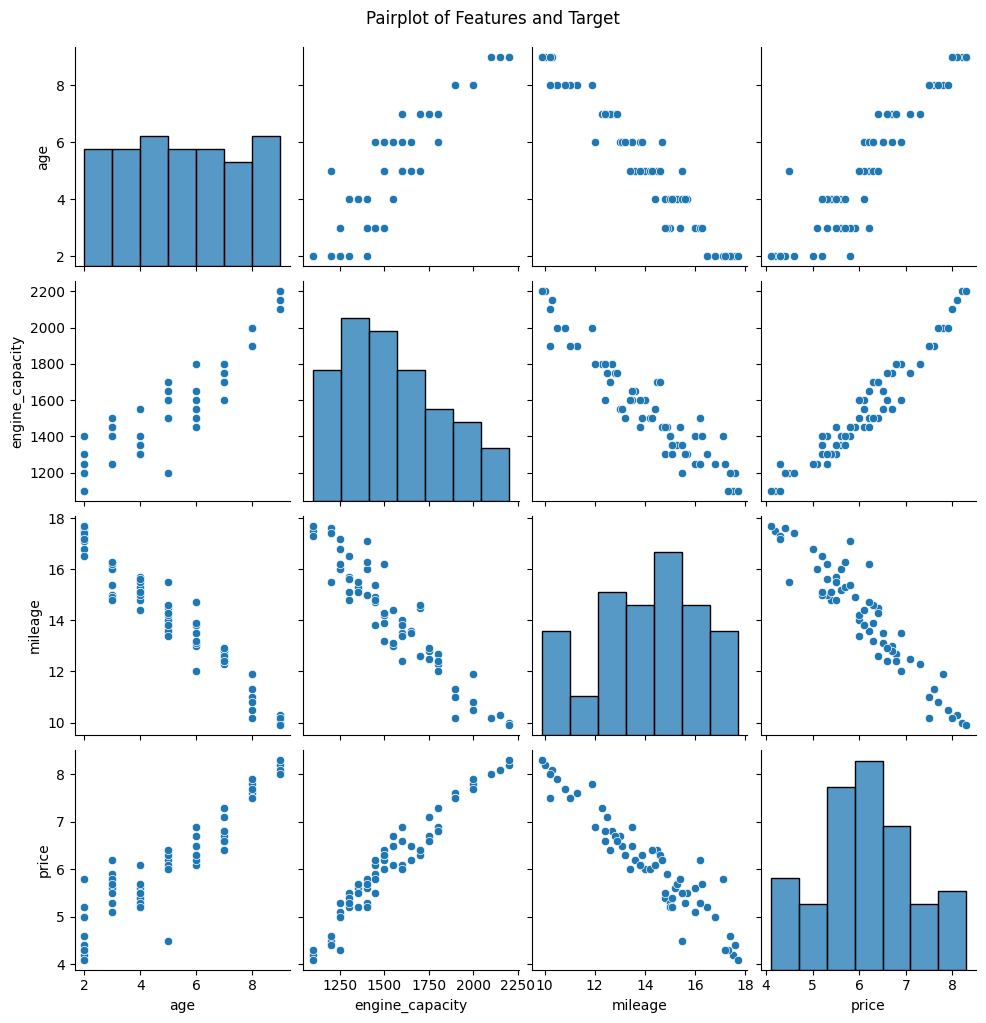

In [5]:
sns.pairplot(df)
plt.suptitle("Pairplot of Features and Target", y=1.02)
plt.show()

### 4. Define Features and Labels

##### **Features and Labels**

Here we will use **engine_capacity (in CC), age (age of a car)** and **mileage** as *features* to determine **the price of the car**, which will be our *label*.

We can represent this as an equation:

`price` = *(m1 x engine_capacity) + (m2 x age) + (m3 x mileage) + b*

In [6]:
X = df[['engine_capacity', 'age', 'mileage']]
y = df['price']

### 5. Split Data into Training and Testing Sets

Splitting ensures we can evaluate model generalization.

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)
print(f"Training samples: {X_train.shape[0]}, Testing samples: {X_test.shape[0]}")

Training samples: 48, Testing samples: 16


### 6. Train the Multiple Linear Regression Model

In [8]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

### 7. Model Coefficients and Intercept

Coefficients show the impact of each feature on price.

In [9]:
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Coefficients: [ 0.00236137  0.11499347 -0.03883335]
Intercept: 2.466324998437942


### 8. Make Predictions

In [11]:
# Predict on test set
y_pred = model.predict(X_test)

# Predict for a new car: 900 CC, 5 Years old, 12.5 km/ltr
sample_pred = model.predict([[900, 5, 12.5]])
print(f"Predicted price for [900 CC, 5yrs, 12.5km/l]: {sample_pred[0]:.2f}")  

Predicted price for [900 CC, 5yrs, 12.5km/l]: 4.68


### 10. Evaluate Model Performance

These metrics help assess prediction accuracy.

In [12]:
# R² Score
r2 = model.score(X_test, y_test)
print(f"R² Score: {r2:.3f}")

# MAE, MSE, RMSE
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")

R² Score: 0.871
MAE: 0.28
MSE: 0.13
RMSE: 0.35


### 11. Visualize Predictions vs Actual

Points close to the red line indicate good predictions.

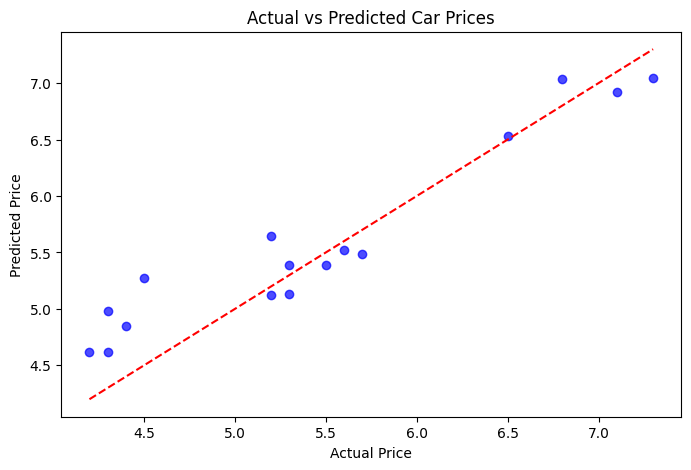

In [13]:
plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred, color='blue', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Car Prices')
plt.show()

### Summary

* This notebook demonstrated Multiple Linear Regression on a car prices dataset. 

* We visualized the data, trained a model, made predictions, and evaluated performance using R², MAE, MSE, and RMSE. 

* This workflow can be adapted to other regression problems with multiple features.

---

### **Exercise: Multiple Linear Regression**

### Problem Statement

A real estate company in India wants to predict the selling price of houses based on their characteristics. They have collected data for houses including:

* area (in square feet)
* bedrooms (number of bedrooms)
* age (age of the house in years)
* price (in lakhs INR)

The goal is to build a Multiple Linear Regression model to predict house prices.

* Download dataset : [exam_scores.csv](https://raw.githubusercontent.com/prakash-ukhalkar/ML/refs/heads/main/01_Simple%20Linear%20Regression_ML/Exercise_SLR/exam_scores.csv) 
* Solution : [Exercise - Multiple Linear Regression](https://github.com/prakash-ukhalkar/ML/blob/main/01_Simple%20Linear%20Regression_ML/Exercise_SLR/01_Exercise_Linear_Regression_ML.ipynb)